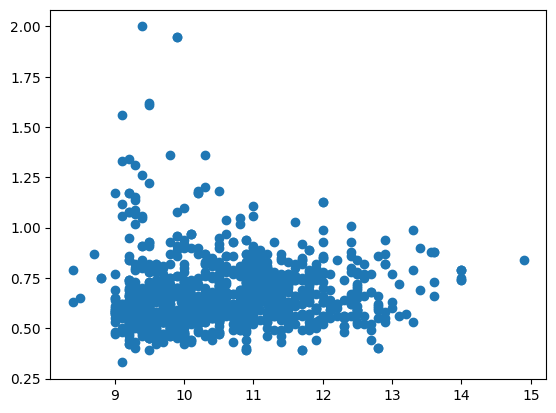

In [40]:
from sklearn.datasets import make_moons
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#import of the file and selection of 2 features, to represent it into a 2 dimensional space
X = pd.read_csv('./sample_data/Wine.csv')
selected_features = ['alcohol', 'sulphates']
X = X[selected_features].values

#dataset visualization
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [43]:
from sklearn.cluster import DBSCAN

#fitting the model
dbscan = DBSCAN(eps=0.1, min_samples=15)
dbscan.fit(X)

labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Estimated number of clusters: {n_clusters_}")

Estimated number of clusters: 5


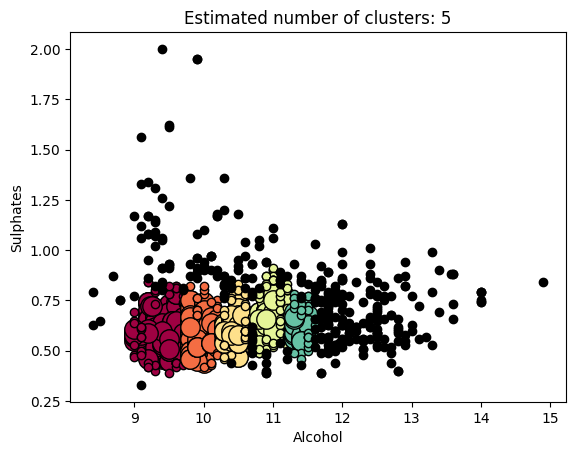

In [44]:
unique_labels = set(labels)

# for the cluster colored representation, credits to https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.xlabel('Alcohol')
plt.ylabel('Sulphates')
plt.show()